# Reading Multi Spectral Images

https://nbviewer.jupyter.org/github/thomasaarholt/hyperspy-demos/blob/master/2_SVD_and_BSS.ipynb

## Bands and Wavelengths
When talking about spectral data, we talk from both, the electromagnetic spectrum and image bands. Spectral remote sensing data are collected by powerful camera-like instruments known as imaging spectrometers. Imaging spectrometers collect reflected light energy in “bands.”

A band represents a segment of the electromagnetic spectrum. For example, the wavelength values between 800 nanometers (nm) and 850 nm might be one band captured by an imaging spectrometer. The imaging spectrometer collects reflected light energy within a pixel area on the ground. Since an imaging spectrometer collects many different types of light - for each pixel the amount of light energy for each type of light or band will be recorded. So, for example, a camera records the amount of red, green and blue light for each pixel.

Often when we work with a multispectral dataset, the band information is reported as the center wavelength value. This value represents the center point value of the wavelengths represented in that band. Thus in a band spanning 800-850 nm, the center would be 825 nm.

## Spectral Resolution
The spectral resolution of a dataset that has more than one band, refers to the spectral width of each band in the dataset. While a general spectral resolution of the sensor is often provided, not all sensors collect information within bands of uniform widths.

## Spatial Resolution
The spatial resolution of a raster represents the area on the ground that each pixel covers. If you have smaller pixels in a raster the data will appear more “detailed.” If you have large pixels in a raster, the data will appear more coarse or “fuzzy.”


## Multispectral Imagery
Images obtained with a ADC Lite - Tetracam's Lightweight ADC

I made pitures about: 

>Aluminum , Copper, Brass, Iron, Stainless Steel, Painted Iron 

http://tetracam.com/Products-ADC_Lite.htm

MRobalinho - 25-03-2019

In [1]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from openpyxl import load_workbook

In [2]:
# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir)  

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [12]:
# Path to the image files
folder = "imagedata03"
path = currDir + "/" + folder + "/"

# Part name of file to filter files
end_file = ".jpg"

In [13]:
# Read files from folder
print(path)
print(' ---- IMAGES ON THE FOLDER -------')

for file in os.listdir(path):
    if file.endswith(end_file):
        print(os.path.join(file))

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata03/
 ---- IMAGES ON THE FOLDER -------
Aluminum_1.jpg
Aluminum_2.jpg
Brass_1.jpg
Brass_2.jpg
CopperWire_1.jpg
CopperWire_2.jpg
Copper_1.jpg
Copper_2.jpg
Iron_1.jpg
Iron_2.jpg
PaintedIron_1.jpg
PaintedIron_2.jpg
resized_picture.jpg
StainlessSteel_1.jpg
StainlessSteel_2.jpg


In [14]:
# Create Data Frame with image information
df_image = []

In [15]:
# Look from an chanel from then image

def channel(img, n):
    """Isolate the nth channel from the image.

       n = 0: red, 1: green, 2: blue
    """
    a = np.array(img)
    a[:,:,(n!=0, n!=1, n!=2)] *= 0
#   a[:,:,n] *= 0
#   print(Image.fromarray(a), 'Get Channel n: ', n)

    print('Get Channel n: ', n)
    return Image.fromarray(a)

# def to resize 
# Given parameters : image , number to divide (resize)
def imageResize(img, n):
    width, height = img.size 

    print('Original size:', width, '/', height, 'Resize:',n)
    
    newWidth = int(width / n)
    newHeight = int(height / n)
    img.resize((newWidth, newHeight), Image.ANTIALIAS)
    print('New size:', newWidth, '/', newHeight)
    return img

In [16]:
# Obtain main color from image
# https://convertingcolors.com/rgb-color-169_171_170.html
    
def get_main_color(path, file):
    img = Image.open(path+file)
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    print('Get main Color file:', file)
    max_occurence, most_present = 0, 0
    try:
        for c in colors:
            if c[0] > max_occurence:
                (max_occurence, most_present) = c
        return most_present
    except TypeError:
        raise Exception("Too many colors in the image")

In [17]:
def print_file(path, xfile):
  print('------------------------------------------------------------------------')   
  tif_f1 = Image.open(path+xfile)
  
  print('Inf.File:',xfile)
    
  # Transform Image to array
  aArray = np.array(tif_f1)
  # Array sum  
  xsum = aArray.sum() / 1000000
    
  # Get channel 0
  x0_channel = channel(tif_f1, 0)
  aArray = np.array(x0_channel)
  xsum_0 = aArray.sum() / 1000000  
    
  # Get channel 1
  x1_channel = channel(tif_f1, 1)
  aArray = np.array(x1_channel)
  xsum_1 = aArray.sum() / 1000000  
         
  # Get channel 2
  x2_channel = channel(tif_f1, 2)
  aArray = np.array(x2_channel)
  xsum_2 = aArray.sum() / 1000000  

  # Histogram from image
  aHist = tif_f1.histogram()
  hsum = sum(aHist) / 100000

  # Histogram channel 0
  aHist_0 = x0_channel.histogram()
  hsum_0 = sum(aHist_0) / 100000

  # Histogram channel 1
  aHist_1 = x1_channel.histogram()
  hsum_1 = sum(aHist_1) / 100000
  
  # Histogram chanel 0
  aHist_2 = x2_channel.histogram()
  hsum_2 = sum(aHist_2) / 100000
 
  # number elements on list
  nlist = len(aHist)
    
  # Get color
  main_color = get_main_color(path, xfile)
  # Transform tuple in a list
  pix_color_a = [list(main_color) for x in main_color]
  pix_color_b = [x for sets in pix_color_a for x in sets] 
  # Sum the list and medium list pixel
  sum_color = sum(pix_color_b)
  med_color = sum_color / len(pix_color_b)
  #print('List Color:',pix_color_a,'Sum:',sum_color,'Len:', len(pix_color_a), 'Med:',med_color)

  # Get Extrems of the image
  extr_a = tif_f1.getextrema() 
  # Transform tuple in a list    
  extr_b = [x for sets in extr_a for x in sets]
  # Sum the list  
  sum_list = sum(extr_b) 
  med_extr  = sum_list / len(extr_b)
  #print('List Extremes:',extr_a,'Sum:',sum_list,'Len:', len(extr_b), 'Med:',med_extr)

    
  # Obtain name file without extension 
  sample_name = os.path.basename(xfile).split('_')[0]
 
  # Print information  
  print(sample_name,' Size:',tif_f1.size, ' Format:',tif_f1.format, ' Mode:', tif_f1.mode)
  print('          Sum array:',xsum, ' Sum Ch 0:', xsum_0, ' Sum Ch 1:', xsum_1, ' Sum Ch 2:', xsum_2)      
  print('          Histog   :',hsum ,'  N.List elem:', nlist )
  print('          Color    :',main_color,'Med Color   :',med_color)
  print('          Extremes :',extr_a, 'Med Extremes:',med_extr)
    
   # insert information in a Pandas Data Frame
  df_image.append((folder, xfile, sample_name, tif_f1.size, tif_f1.format, tif_f1.mode , 
                   xsum, xsum_0, xsum_1, xsum_2, hsum, nlist, main_color, med_color, med_extr))  

In [18]:
# Create Data Frame with image information
df_image = []

xend_file = "*" + end_file
os.chdir(path)
for file in glob.glob(xend_file):
 #   print(file)
    print_file(path,file)

------------------------------------------------------------------------
Inf.File: Aluminum_1.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Get main Color file: Aluminum_1.jpg
Aluminum  Size: (5312, 2988)  Format: JPEG  Mode: RGB
          Sum array: 3487.099309  Sum Ch 0: 2614.556834  Sum Ch 1: 2600.402524  Sum Ch 2: 2567.107247
          Histog   : 476.16768   N.List elem: 768
          Color    : (189, 185, 176) Med Color   : 183.33333333333334
          Extremes : ((0, 255), (0, 255), (9, 255)) Med Extremes: 129.0
------------------------------------------------------------------------
Inf.File: Aluminum_2.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Get main Color file: Aluminum_2.jpg
Aluminum  Size: (5312, 2988)  Format: JPEG  Mode: RGB
          Sum array: 3385.02785  Sum Ch 0: 2605.312306  Sum Ch 1: 2566.324541  Sum Ch 2: 2508.358299
          Histog   : 476.16768   N.List elem: 768
          Color    : (219, 220, 225) Med Color   : 221.33333333333334
 

In [19]:
df = pd.DataFrame(df_image,columns=['Folder','File','Material','Size','Format','Mode',
                                    'All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2',
                                    'Histogram','Number_list_elements','Color','Med_Color','Med_Extrems'])
df.head(100)

,Folder,File,Material,Size,Format,Mode,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Histogram,Number_list_elements,Color,Med_Color,Med_Extrems
0,imagedata03,Aluminum_1.jpg,Aluminum,"(5312, 2988)",JPEG,RGB,3487.099309,2614.556834,2600.402524,2567.107247,476.16768,768,"(189, 185, 176)",183.333333,129.000000
1,imagedata03,Aluminum_2.jpg,Aluminum,"(5312, 2988)",JPEG,RGB,3385.027850,2605.312306,2566.324541,2508.358299,476.16768,768,"(219, 220, 225)",221.333333,133.000000
2,imagedata03,Brass_1.jpg,Brass,"(5312, 2988)",JPEG,RGB,3351.352573,2626.345572,2553.685796,2466.288501,476.16768,768,"(179, 180, 182)",180.333333,130.833333
3,imagedata03,Brass_2.jpg,Brass,"(5312, 2988)",JPEG,RGB,3042.114982,2557.807633,2458.070949,2321.203696,476.16768,768,"(169, 171, 170)",170.000000,133.666667
4,imagedata03,CopperWire_1.jpg,CopperWire,"(5312, 2988)",JPEG,RGB,2595.753222,2314.445608,2313.038337,2263.236573,476.16768,768,"(219, 218, 223)",220.000000,127.500000
5,imagedata03,CopperWire_2.jpg,CopperWire,"(5312, 2988)",JPEG,RGB,2767.450280,2402.427970,2355.234040,2304.755566,476.16768,768,"(212, 211, 209)",210.666667,125.666667
6,imagedata03,Copper_1.jpg,Copper,"(5312, 2988)",JPEG,RGB,3400.502407,2731.080699,2549.470157,2414.918847,476.16768,768,"(201, 205, 204)",203.333333,137.166667
7,imagedata03,Copper_2.jpg,Copper,"(5312, 2988)",JPEG,RGB,2350.073737,2487.141282,2187.855680,1970.044071,476.16768,768,"(190, 193, 186)",189.666667,136.333333
8,imagedata03,Iron_1.jpg,Iron,"(5312, 2988)",JPEG,RGB,2829.021121,2388.854306,2389.478945,2345.655166,476.16768,768,"(174, 174, 176)",174.666667,136.833333
9,imagedata03,Iron_2.jpg,Iron,"(5312, 2988)",JPEG,RGB,3113.450410,2483.186029,2480.633123,2444.598554,476.16768,768,"(188, 183, 180)",183.666667,128.000000


In [20]:
# Verify my current folder
path = mypath + r"/upt_data.xlsx"
print('Write statistics into file :', path)

# Block to Read excel old excel file
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
# ------------------------

# Write statistics into excel file
#writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # only for new excelfile
df.to_excel(writer, sheet_name = folder)
writer.save()
writer.close()

Write statistics into file : C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/upt_data.xlsx


In [21]:
df_plot = pd.DataFrame(df, columns=["Material", "All_Bands", "Sum_Ch0", "Sum_Ch1", "Sum_Ch2","Med_Color","Med_Extrems"])
df_plot


,Material,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Med_Color,Med_Extrems
0,Aluminum,3487.099309,2614.556834,2600.402524,2567.107247,183.333333,129.000000
1,Aluminum,3385.027850,2605.312306,2566.324541,2508.358299,221.333333,133.000000
2,Brass,3351.352573,2626.345572,2553.685796,2466.288501,180.333333,130.833333
3,Brass,3042.114982,2557.807633,2458.070949,2321.203696,170.000000,133.666667
4,CopperWire,2595.753222,2314.445608,2313.038337,2263.236573,220.000000,127.500000
5,CopperWire,2767.450280,2402.427970,2355.234040,2304.755566,210.666667,125.666667
6,Copper,3400.502407,2731.080699,2549.470157,2414.918847,203.333333,137.166667
7,Copper,2350.073737,2487.141282,2187.855680,1970.044071,189.666667,136.333333
8,Iron,2829.021121,2388.854306,2389.478945,2345.655166,174.666667,136.833333
9,Iron,3113.450410,2483.186029,2480.633123,2444.598554,183.666667,128.000000


In [22]:
df_plot.Sum_Ch0 = df_plot.Sum_Ch0 + 100 # to have diference lines during plot
df_plot.Sum_Ch1 = df_plot.Sum_Ch1 + 200
df_plot.Sum_Ch2 = df_plot.Sum_Ch2 + 300
df_plot.Med_Color  = df_plot.Med_Color * 10
df_plot.Med_Extrems  = df_plot.Med_Extrems * 10
df_plot

,Material,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Med_Color,Med_Extrems
0,Aluminum,3487.099309,2714.556834,2800.402524,2867.107247,1833.333333,1290.000000
1,Aluminum,3385.027850,2705.312306,2766.324541,2808.358299,2213.333333,1330.000000
2,Brass,3351.352573,2726.345572,2753.685796,2766.288501,1803.333333,1308.333333
3,Brass,3042.114982,2657.807633,2658.070949,2621.203696,1700.000000,1336.666667
4,CopperWire,2595.753222,2414.445608,2513.038337,2563.236573,2200.000000,1275.000000
5,CopperWire,2767.450280,2502.427970,2555.234040,2604.755566,2106.666667,1256.666667
6,Copper,3400.502407,2831.080699,2749.470157,2714.918847,2033.333333,1371.666667
7,Copper,2350.073737,2587.141282,2387.855680,2270.044071,1896.666667,1363.333333
8,Iron,2829.021121,2488.854306,2589.478945,2645.655166,1746.666667,1368.333333
9,Iron,3113.450410,2583.186029,2680.633123,2744.598554,1836.666667,1280.000000


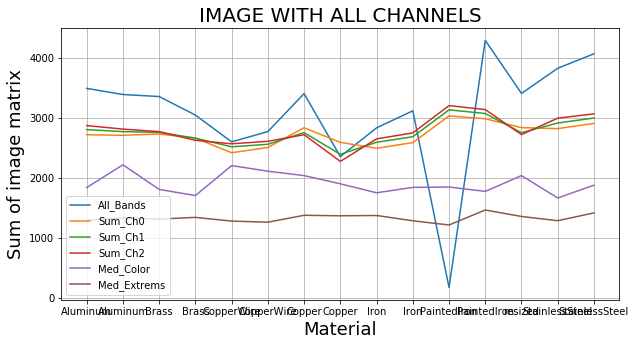

In [23]:
df_plot.plot(y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Med_Color","Med_Extrems"],figsize=(10,5), grid=True )

# Obtain legend (xticks) for X axis
loc_Array_sum = np.arange(len(df_plot.index))
# Position of X labels
xtick_loc = list(loc_Array_sum)  
# Name of x labels
xticks = list(df_plot.Material)
#-------

#plt.plot(df_plot.Array_sum)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, df_plot.Material, rotation=0)
plt.xlabel('Material',fontsize=18)
plt.show()

In [24]:
# Create pivot table
df_plot1 = df_plot.groupby('Material')['All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2','Med_Color','Med_Extrems'].mean()
df_plot1

,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Med_Color,Med_Extrems
Material,,,,,,
Aluminum,3436.063579,2709.934570,2783.363533,2837.732773,2023.333333,1310.000000
Brass,3196.733778,2692.076603,2705.878373,2693.746098,1751.666667,1322.500000
Copper,2875.288072,2709.110991,2568.662919,2492.481459,1965.000000,1367.500000
CopperWire,2681.601751,2458.436789,2534.136188,2583.996069,2153.333333,1265.833333
Iron,2971.235766,2536.020167,2635.056034,2695.126860,1791.666667,1324.166667
PaintedIron,2228.343639,3004.638175,3099.093935,3167.062473,1806.666667,1335.000000
StainlessSteel,3943.343196,2859.910568,2951.660300,3026.739624,1766.666667,1346.666667
resized,3403.152445,2832.991551,2748.093134,2717.035056,2033.333333,1351.666667


In [25]:
df = pd.DataFrame(df_plot1.All_Bands)   
color = ['red','blue','green','orange','cyan','black','yellow']

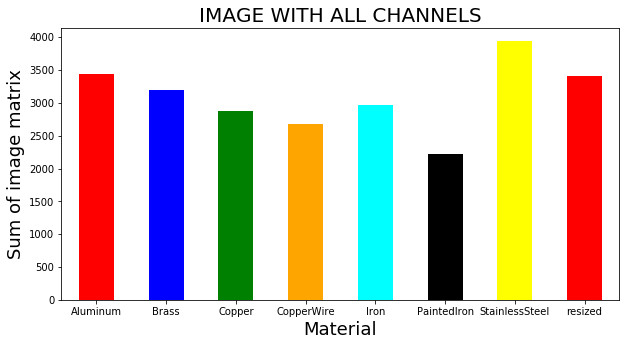

In [26]:
df.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

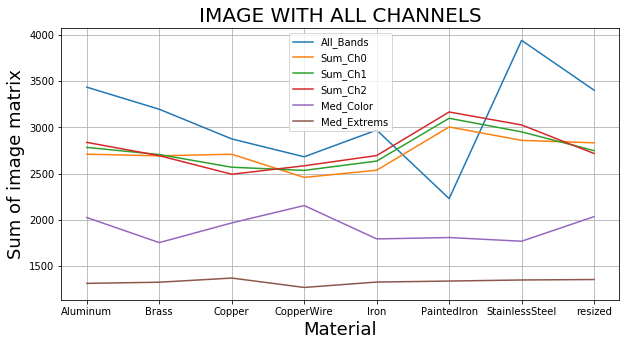

In [27]:
loc_Array_sum = np.arange(len(df_plot1.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot1.plot( y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Med_Color","Med_Extrems"],figsize=(10,5), grid=True )
plt.xticks(xtick_loc, df_plot1.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

In [28]:
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

xtick_loc = list(loc_g)  
xticks = list(df_plot1.index)

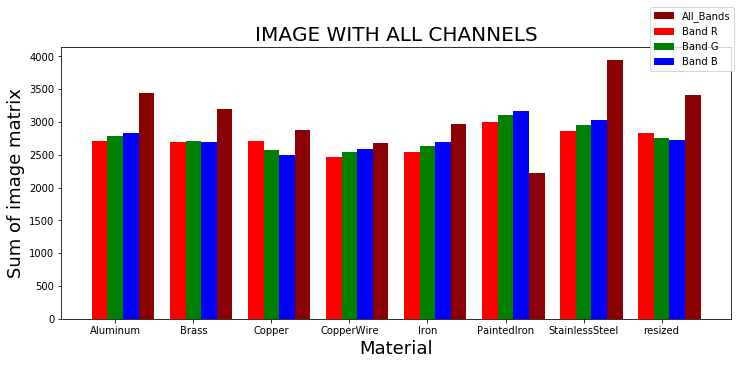

In [29]:
#Plot  Bar Graph
#df_plot1.plot(kind='bar', figsize=(12,5), grid=True, color='darkred',fontsize=18)
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

#xtick_loc = list(loc_Array_sum) + list(loc_r) + list(loc_g) + list(loc_b)
#xticks = list(selected.keys())+ list(rejected.keys())
colors = ['darkred','red','green','blue','orange','cyan','black','yellow']
plt.figure(figsize=(12,5))

plt.bar(loc_Array_sum, df_plot1.All_Bands, color=colors[0], width=0.2, label='All_Bands')
plt.bar(loc_r, df_plot1.Sum_Ch0, color=colors[1], width=0.2,label='Band R')
plt.bar(loc_g, df_plot1.Sum_Ch1, color=colors[2], width=0.2,label='Band G')
plt.bar(loc_b, df_plot1.Sum_Ch2, color=colors[3], width=0.2,label='Band B')

plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, xticks, rotation=0)
plt.legend(bbox_to_anchor=(.8,0.8),\
    bbox_transform=plt.gcf().transFigure)

plt.show()

<Figure size 432x288 with 0 Axes>

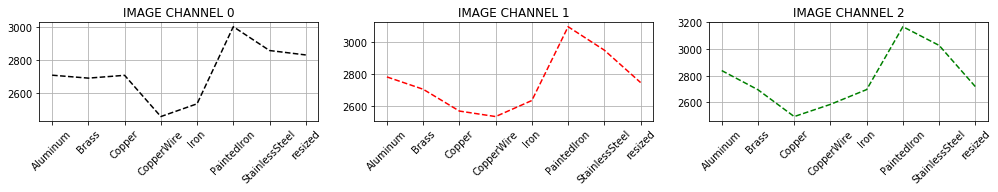

In [30]:
plt.figure(1)
plt.figure(figsize=(17, 4))
plt.tight_layout()
plt.subplot(231)
plt.title('IMAGE CHANNEL 0')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch0, 'k--')

plt.subplot(232)
plt.title('IMAGE CHANNEL 1')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch1,  'r--')

plt.subplot(233)
plt.title('IMAGE CHANNEL 2')
plt.xticks(rotation=45)
plt.plot(df_plot1.Sum_Ch2,  'g--')
plt.grid(True)
plt.show()

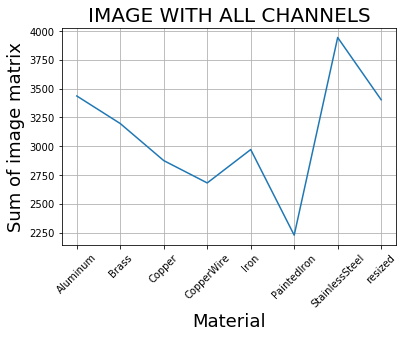

In [31]:
# Plot channel based
plt.plot(df_plot1.All_Bands)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

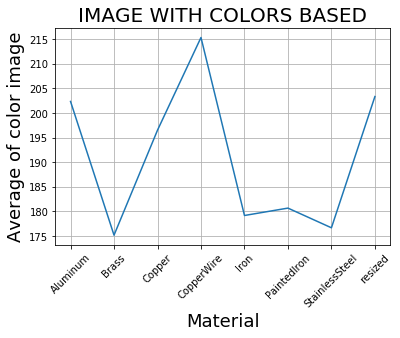

In [32]:
# Plot based on color
plt.plot(df_plot1.Med_Color/10)
plt.title('IMAGE WITH COLORS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of color image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

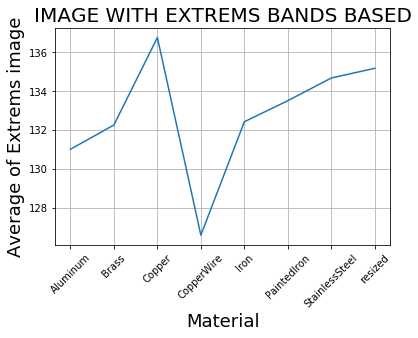

In [33]:
# Plot based on Extrems of the Bands
plt.plot(df_plot1.Med_Extrems/10)
plt.title('IMAGE WITH EXTREMS BANDS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Extrems image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()